In [1]:
import os
from imp import reload
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

# Lical Library
import imgpatch
import vcompresslib

Using TensorFlow backend.


In [2]:
# The image is actually 240 x 416, 
#     so we will have 15 x 26 patches with frame shape of 15 x 26 instead of 26 x 15

# Data options
data_path = ['RaceHorses_416x240_30','BlowingBubbles_416x240_50' , 'BasketballDrill_832x480_50']

# Load data
image_data = imgpatch.load_data(data_path[0]) 

# Define training data, and test data
train_image, test_image = train_test_split(image_data, train_size = 0.75)

# Patch shape
patch_shape = (16, 16, 3)

# Convert image data to patches
train_data = imgpatch.get_patch(train_image, patch_shape)
test_data = imgpatch.get_patch(test_image, patch_shape)

(87750, 16, 16, 3)
(29250, 16, 16, 3)


In [3]:
# Train model
autoencoder = vcompresslib.test_model(train_data, patch_shape, '1/2')

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 16, 16, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        9472      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          51232     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 16)          528       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 8)           1160      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 3)           219 

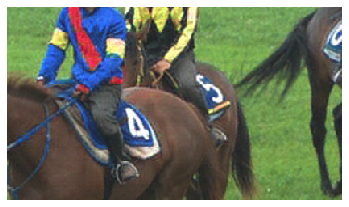

In [4]:
# Feed test data into the feed model, and get decoded images 
decoded_image = vcompresslib.get_decoded_image(autoencoder, test_data, \
                                               patch_shape, image_data.shape)
# Plot a sample decoded image
plt.axis('off')
plt.imshow(decoded_image[4])

In [5]:
# Calculate average PSNR
PSNR = vcompresslib.get_psnr(test_image, decoded_image)

print(PSNR)

27.730924987792967
